# Imports

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import yfinance as yf

## Get stock data

In [2]:
ticker = 'SPY'
stock_df = yf.download('SPY', start='2018-01-01')
stock_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,245.828461,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,247.383331,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,248.425995,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,250.081528,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,250.538818,57319200


## Make EWM column

In [3]:
def get_ewm_col(alpha: float=0.9): # higher alpha, less weight given to previous smoothed value and larger weight given to recent observed value
    stock_df['EWM'] = stock_df['Adj Close'].ewm(alpha=alpha).mean()

In [4]:
get_ewm_col()
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,EWM
Date,,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,245.828461,86655700,245.828461
2018-01-03,268.959991,270.640015,268.959991,270.470001,247.383331,90070400,247.241979
2018-01-04,271.200012,272.160004,270.540009,271.609985,248.425995,80636400,248.308660
2018-01-05,272.510010,273.559998,271.950012,273.420013,250.081528,83524000,249.904401
2018-01-08,273.309998,274.100006,272.980011,273.920013,250.538818,57319200,250.475382


## Try to regress change in EWM on change in volume

0.1059883205251595


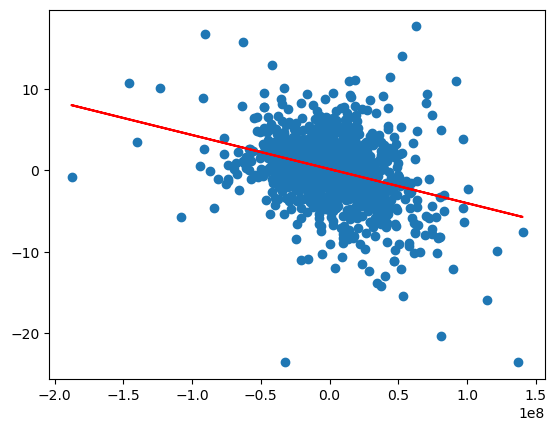

In [5]:
x = stock_df['Volume'].diff()[1:].values.reshape(-1, 1)
y = stock_df['EWM'].diff()[1:].values.reshape(-1, 1)

lm = Ridge(alpha=0.001)
lm.fit(x, y)
print(lm.score(x, y))

beta_0 = lm.intercept_[0]
beta_1 = lm.coef_[0][0]
assert isinstance(beta_0, float) and isinstance(beta_1, float)

plt.scatter(x, y)
plt.plot(x, beta_0 + beta_1 * x, color='red')
plt.show()